In [1]:
import gym
import time
import matplotlib.pyplot as plt
from pyswip import Prolog
import IPython.display as display
from project_utils import define_reward, process_state, perform_action, show_match


In [2]:
des_file="""
MAZE: "mylevel", ' '
FLAGS:hardfloor,premapped
MESSAGE: "Welcome to MiniHack!"
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
...........
...........
...........
...........
...........
...........
...........
...........
...........
ENDMAP
$place = { (10,8),(0,8),(10,0) }
SHUFFLE: $place
REGION:(0,0,11,9),lit,"ordinary"
REPLACE_TERRAIN:(0,0,11,9), '.', 'C', 33%
REPLACE_TERRAIN:(0,0,11,9), '.', 'T', 25%
TERRAIN:randline (0,9),(11,0), 5, '.'
TERRAIN:randline (0,0),(11,9), 5, '.'
MONSTER: ('N',"red naga"),$place[0], hostile
BRANCH:(0,0,0,0),(1,1,1,1)
STAIR:$place[2],down
"""

obs["screen_descriptions"] è un tensor of utf-8 encodings of textual descriptions of each cell present in the map. NetHack provides these textual descriptions (which can be accessed by the user by using the describe action on a specific tile).<br>
Ogni elemento del tensore è un descrittore di una delle possiili 21 * 71 celle mappabili della mappa di gioco. ogni cella, individuata dai primi due parametri del tensore individua una stringa di 80 byte/caratteri, codificati utf-8. i caratteri che descrivono la cella di gioco possono essere al più 80 e nel caso ne servano meno, i restanti caratteri saranno utf-8 \x00, le celle che non descrivono nulla nella mappa (a causa del fattto che la mappa non è sempre composta da 21*71 celle, saranno composte da \x00 ripetuto 80 volte.<br>
\x00 indica un byte di valore 00, nello specifico \x00 è la codica utf-8 del carattere nullo, 0 in obs["screen_descriptions"]<br>


## Esempio

In [4]:
obs['screen_descriptions'][7][33]
#array di interi a 8 bit

array([102, 108, 111, 111, 114,  32, 111, 102,  32,  97,  32, 114, 111,
       111, 109,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [5]:
bytes(obs['screen_descriptions'][7][33])
#array di bytes a 8 bit (non cambia nulla in realtà ma la funzione print stampa come caratteri piuttosto che interi

b'floor of a room\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [6]:
bytes(obs['screen_descriptions'][7][33]).decode('utf-8')
#adesso è effettivamente una stringa

'floor of a room\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [7]:
bytes(obs['screen_descriptions'][7][33]).decode('utf-8').rstrip('\x00')

'floor of a room'

In [3]:
env = gym.make("MiniHack-Navigation-Custom-v0",des_file=des_file,
              observation_keys=('screen_descriptions','message','pixel','blstats'))

test mappa con tastiera

In [110]:
"""
    'north' =      0
     'east' =      1
     'south' =     2
     'west' =      3
     'northeast' = 4
     'southeast' = 5
     'southwest' = 6
     'northwest' = 7
"""
import time
def change(a):
    a=int(a)
    if a == 1:
        return 6
    if a == 2:
        return 2
    if a == 3:
        return 5
    if a == 4:
        return 3
    if a == 6:
        return 1
    if a == 7:
        return 7
    if a ==8:
        return 0
    if a == 9:
        return 4
    print("input non valido, reinserire")
    return change(input())
    
    
obs =  env.reset()
env.render()
#image = plt.imshow(obs["pixel"][115:275, 480:750])
#display.display(plt.gcf())
print("enter command")
action_id = int(change(input()))
obs, reward, done, info=env.step(action_id)

for i in range (50):  
    if done:
        print("FINE")
        break
    #display.clear_output(wait=True)
    #image.set_data(obs["pixel"][115:275, 480:750])
    env.render()
    #display.display(plt.gcf())
    #print(bytes(obs["message"]).decode('utf-8').rstrip('\x00'))
    print("enter command")
    action_id = int(change(input()))
    obs, reward, done, info=env.step(action_id)
    
env.render()
print(f'End status: {info["end_status"].name}')
print(bytes(obs["message"]).decode('utf-8').rstrip('\x00'))



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                  ..                                                            
                  .#..#.#....                                                   
                  .#..#....#.                                                   
                  .......#..#                                                   
                  ..##....#.#                                                   
                  ..>.....#

 8



                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                  ..                                                            
                  .#..#.#....                                                   
                  .#..#....#.                                                   
                  ......H#..#                                                   
                  ..##....#.#                                                   
                  ..>.....#

 7



                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                  ..                                                            
                  .#..#.#....                                                   
                  .#..#....#.                                                   
                  .......#..#                                                   
                  ..##.H..#.#                                                   
                  ..>@....#

 4


FINE

                                                                                
 No  Points     Name                                                   Hp [max] 
                                                                                
            0  Agent-Rog-Hum-Mal-Cha quit in The Dungeons of Doom on            
                                                                                
              level 1.                                               12  [12]   
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                      

In [4]:
NUM_EPISODES = 1000
MAX_STEPS = 30
PATH = 'project_kb.pl'
MONSTER = ['giant', 'ettin', 'titan', 'minotaur', 'naga', 'lich', 'ogre', 'dragon', 'troll', 'Olog-hai'] #possible monsters in this environment
rewards = []
KB = Prolog()
KB.consult(PATH)

start=time.time()
win=0
for episode in range(NUM_EPISODES):
    # count the number of steps of the current episode
    steps = 0
    # store the cumulative reward
    reward = 0.0
    # collect obs['pixel'] to visualize
    ep_states = []
    # reset KB before eacj episode starts
    KB.retractall("already_walked(_,_)")
    KB.retractall("lastKnownEnemyPosition(_,_)")

    obs = env.reset()
    ep_states.append(obs['pixel'])
    done = False

    # Main loop
    while not done and steps < MAX_STEPS:
        # Get the observation from the env and assert the facts in the kb 
        asserts=process_state(obs, KB, MONSTER, steps)
       
        # print(f'> Current player position: {player_pos}')
        # Query Prolog
        # Run the inference and get the action to perform
        # Get the first answer from Prolog -> the top-priority action
        try:
            action = list(KB.query('action(X)'))[0]
            action = action['X']
            #print(action)
            #time.sleep(0.5)
        except Exception as e:
            action = None

        # Perform the action in the environment
        if action:
            obs, reward, done, info = perform_action(action, env)
        
            # print(f'>> Current action from Prolog: {action}')
            ep_states.append(obs['pixel'])
            #env.render()
        else:
            print("ERROR: impossible to perform any action. Please check assertions and definitions in KB.")
            env.render()
            for a in asserts:
                    print(a)
            for a in list(KB.query('already_walked(A,B)')):
                print(a)

            print("\n\n")
            for a in list(KB.query('lastKnownEnemyPosition(A,B)')):
                print(a)
            break

        steps += 1

    # Display game with interface
    #show_match(ep_states)
    # Print information about the ended episode
    #print(f'Episode {episode} - {steps} steps')
    #print("Episode = "+str(episode),end="\r")
    
    try:
        print(f'End status: {info["end_status"].name}')
        if info["end_status"].name  == "TASK_SUCCESSFUL":
            win+=1
    except NameError as e1:
        print(f'No end status info available')
    """
    if reward < 1.0:
        seeds = env.get_seeds()
        print({seeds})
        try:
            f = open("unsolved_maps/seeds.txt", "a")
            f.write(str(seeds[0]))
            f.write(' ')
            f.write(str(seeds[1]))
            f.write('\n')
            f.close()
            
        except FileNotFoundError as e:
            print(f'File not found')
    
    print(f'Final reward: {reward}')
    """
    #time.sleep(0.75)
    #rewards.append(reward)
    obs = env.reset()
    KB.retractall("previous_agent_position(_,_)")
end=time.time()
print("Winrate = ",(win/NUM_EPISODES))
print("Duration = ",(end-start))
#print(f'After {NUM_EPISODES} episodes, mean return is {sum(rewards)/NUM_EPISODES}')
#print("The rewards of the episodes are:", rewards)


End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: DEATH
End status: DEATH
End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: DEATH
End status: TASK_SUCCESSFUL
End status: DEATH
End status: TASK_SUCCESSFUL
End status: DEATH
End status: DEATH
End status: TASK_SUCCESSFUL
End status: DEATH
End status: TASK_SUCCESSFUL
End status: DEATH
End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: DEATH
End status: DEATH
End status: DEATH
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: TASK_SUCCESSFUL
End status: 

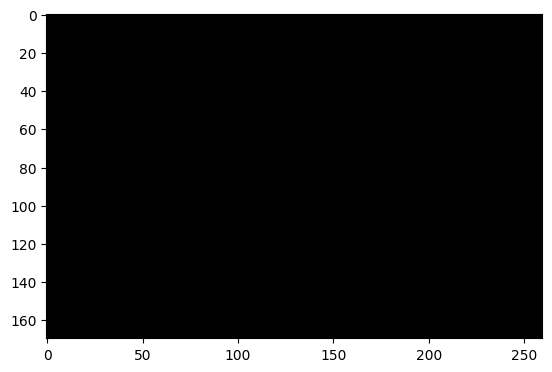

In [5]:
show_match(ep_states)
#plt.imshow(ep_states[6][100:270, 500:760])

In [24]:
from minihack import LevelGenerator

# Define the maze as a string
maze = """
...........
...........
...........
...........
...........
...........
...........
...........
...........
"""
# Set a start and goal positions
lvl_gen = LevelGenerator(map=maze,flags=('hardfloor','premapped'))
lvl_gen.set_start_pos((0,0))
lvl_gen.add_goal_pos((10,8))
# Add a Minotaur at fixed position
lvl_gen.add_monster(name="red naga", place=(5,4))
lvl_gen.add_terrain((6,4),'C')
lvl_gen.add_terrain((1,0),'C')
lvl_gen.add_terrain((2,0),'T')
lvl_gen.add_terrain((4,0),'T')
lvl_gen.add_terrain((5,0),'T')
lvl_gen.add_terrain((7,0),'T')
lvl_gen.add_terrain((4,1),'C')
lvl_gen.add_terrain((6,1),'C')
lvl_gen.add_terrain((8,1),'C')
lvl_gen.add_terrain((0,2),'T')
lvl_gen.add_terrain((10,2),'C')
lvl_gen.add_terrain((0,3),'T')
lvl_gen.add_terrain((10,3),'C')
lvl_gen.add_terrain((1,3),'C')
lvl_gen.add_terrain((0,4),'T')
lvl_gen.add_terrain((8,4),'C')
lvl_gen.add_terrain((9,4),'C')
lvl_gen.add_terrain((1,4),'C')
lvl_gen.add_terrain((0,5),'C')
lvl_gen.add_terrain((1,5),'C')
lvl_gen.add_terrain((4,5),'C')
lvl_gen.add_terrain((9,5),'C')
lvl_gen.add_terrain((1,6),'T')
lvl_gen.add_terrain((5,6),'T')
lvl_gen.add_terrain((6,6),'C')
lvl_gen.add_terrain((10,6),'C')   
lvl_gen.add_terrain((4,7),'C')
lvl_gen.add_terrain((5,7),'C')
lvl_gen.add_terrain((6,7),'C')
lvl_gen.add_terrain((8,7),'C')   
lvl_gen.add_terrain((9,7),'T')    
lvl_gen.add_terrain((4,8),'T')
lvl_gen.add_terrain((1,8),'C')
lvl_gen.add_terrain((6,8),'C')
lvl_gen.add_terrain((7,8),'T')   
lvl_gen.add_terrain((8,8),'T')  

In [10]:
env = gym.make("MiniHack-Navigation-Custom-v0",des_file= lvl_gen.get_des(),
              observation_keys=('screen_descriptions','message','pixel','blstats'))
MONSTER = ['giant', 'ettin', 'titan', 'minotaur', 'naga', 'lich', 'ogre', 'dragon', 'troll', 'Olog-hai'] #possible monsters in this environment
NUM_EPISODES = 1
MAX_STEPS = 30
PATH = 'project_kb.pl'
rewards = []
KB = Prolog()
KB.consult(PATH)

# count the number of steps of the current episode
steps = 0
# store the cumulative reward
reward = 0.0
# collect obs['pixel'] to visualize
ep_states = []
# reset KB before eacj episode starts
KB.retractall("already_walked(_,_)")
KB.retractall("lastKnownEnemyPosition(_,_)")

obs = env.reset()
ep_states.append(obs['pixel'])
done = False

# Main loop
while not done and steps < MAX_STEPS:
    # Get the observation from the env and assert the facts in the kb 
    asserts=process_state(obs, KB, MONSTER, steps)
   
    # print(f'> Current player position: {player_pos}')
    # Query Prolog
    # Run the inference and get the action to perform
    # Get the first answer from Prolog -> the top-priority action
    try:
        action = list(KB.query('action(X)'))[0]
        action = action['X']
        #print(action)
        time.sleep(0.5)
    except Exception as e:
        action = None

    # Perform the action in the environment
    if action:
        obs, reward, done, info = perform_action(action, env)
    
        # print(f'>> Current action from Prolog: {action}')
        ep_states.append(obs['pixel'])
        #env.render()
    else:
        print("ERROR: impossible to perform any action. Please check assertions and definitions in KB.")
        env.render()
        for a in asserts:
                print(a)
        for a in list(KB.query('already_walked(A,B)')):
            print(a)

        print("\n\n")
        for a in list(KB.query('lastKnownEnemyPosition(A,B)')):
            print(a)
        break

    steps += 1



End status: TASK_SUCCESSFUL
Final reward: 1.0
After 1 episodes, mean return is 1.0
The rewards of the episodes are: [1.0]


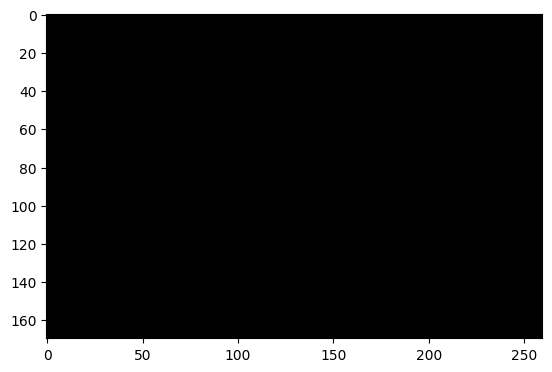

In [11]:
# Display game with interface
show_match(ep_states)
# Print information about the ended episode
#print(f'Episode {episode} - {steps} steps')
try:
    print(f'End status: {info["end_status"].name}')
        
except NameError as e1:
    print(f'No end status info available')

if reward < 1.0:
    seeds = env.get_seeds()
    print({seeds})
    try:
        f = open("unsolved_maps/seeds.txt", "a")
        f.write(str(seeds[0]))
        f.write(' ')
        f.write(str(seeds[1]))
        f.write('\n')
        f.close()
        
    except FileNotFoundError as e:
        print(f'File not found')

print(f'Final reward: {reward}')
time.sleep(0.75)
rewards.append(reward)
obs = env.reset()
KB.retractall("previous_agent_position(_,_)")
print(f'After {NUM_EPISODES} episodes, mean return is {sum(rewards)/NUM_EPISODES}')
print("The rewards of the episodes are:", rewards)

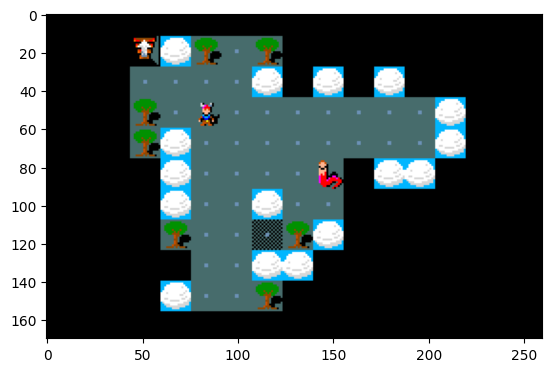

In [57]:
plt.imshow(ep_states[2][100:270, 500:760])

### Prova
Di seguito qualche cella di debug per provare a plottare ad ogni step, sopra le celle "safe" un cerchio, sopra quelle "walkable" non safe un altro segno, il tutto solo sulle celle adiacenti chiaramente

In [ ]:
action = list(KB.query('action(X)'))
plot= {}
for elem in action:
    elem=elem['X']
    elem=elem.strip("move()").split(", ")
    if not(elem[1] in plot.keys()):
        plot[elem[1]] = elem[0]
        print("kk")

plot

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_artist'

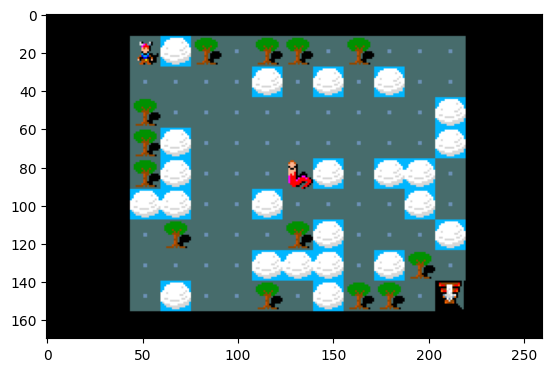

In [48]:
prova={}

if not("asd" in prova.keys()):
    prova["asd"]=20
prova["asd"]
image = plt.imshow(ep_states[0][100:270, 500:760])
prova=plt.Circle((150,550),500)
plt.add_artist(prova)
plt.show()